# Requirements

In [1]:
# Add as many imports as you need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
%matplotlib inline

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('spotify_songs.csv')
data.head(10)

danceability  energy  loudness  speechiness  acousticness  \
0         0.748   0.916    -2.634       0.0583        0.1020   
1         0.726     NaN    -4.969       0.0373        0.0724   
2         0.675   0.931    -3.432       0.0742        0.0794   
3         0.718   0.930    -3.778       0.1020        0.0287   
4         0.650   0.833    -4.672       0.0359        0.0803   
5         0.675     NaN       NaN       0.1270        0.0799   
6           NaN   0.856       NaN       0.0623        0.1870   
7         0.542     NaN    -2.419       0.0434        0.0335   
8         0.594     NaN    -3.562       0.0565        0.0249   
9         0.642   0.818    -4.552       0.0320        0.0567   

   instrumentalness  liveness  valence    tempo genre  
0          0.000000    0.0653    0.518  122.036   pop  
1               NaN    0.3570    0.693   99.972   pop  
2               NaN    0.1100    0.613  124.008   pop  
3          0.000009    0.2040    0.277      NaN   pop  
4          0.000000    0.0833    0.725  123.976   pop  
5          0.000000    0.1430    0.585      NaN   pop  
6          0.000000    0.1760      NaN  112.648   pop  
7               NaN       NaN    0.367  127.936   pop  
8               NaN       NaN    0.366  127.015   pop  
9          0.000000    0.0919      NaN  124.957   pop

Preprocess the input and the output variables appropriately.

In [6]:
# Write your code here. Add as many boxes as you need.
encoder = LabelEncoder()

encoded_values = encoder.fit_transform(data['genre'])

In [7]:
data['genre'] = encoded_values

In [8]:
data

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726     NaN    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428     NaN    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626     NaN       NaN       0.1090      0.007920   
32832         0.603   0.884    -4.571          NaN      0.000133   

       instrumentalness  liveness  valence    tempo  genre  
0              0.000000    0.0653   0.5180  122.036      2  
1                   NaN    0.3570   0.6930   99.972      2  
2                   NaN    0.1100   0.6130  124.008      2  
3              0.000009    0.2040   0.2770      NaN      2  
4              0.000000    0.0833   0.7250  123.976      2  
...                 ...       ...      ...      ...    ...  
32828          0.000000    0.0668   0.2100  128.170      0  
32829          0.004270    0.3750   0.4000  128.041      0  
32830               NaN    0.1500   0.4360  127.989      0  
32831          0.127000    0.3430   0.3080  128.008      0  
32832               NaN    0.7420   0.0894  127.984      0  

[32833 rows x 10 columns]

Explore the dataset using visualizations of your choice.

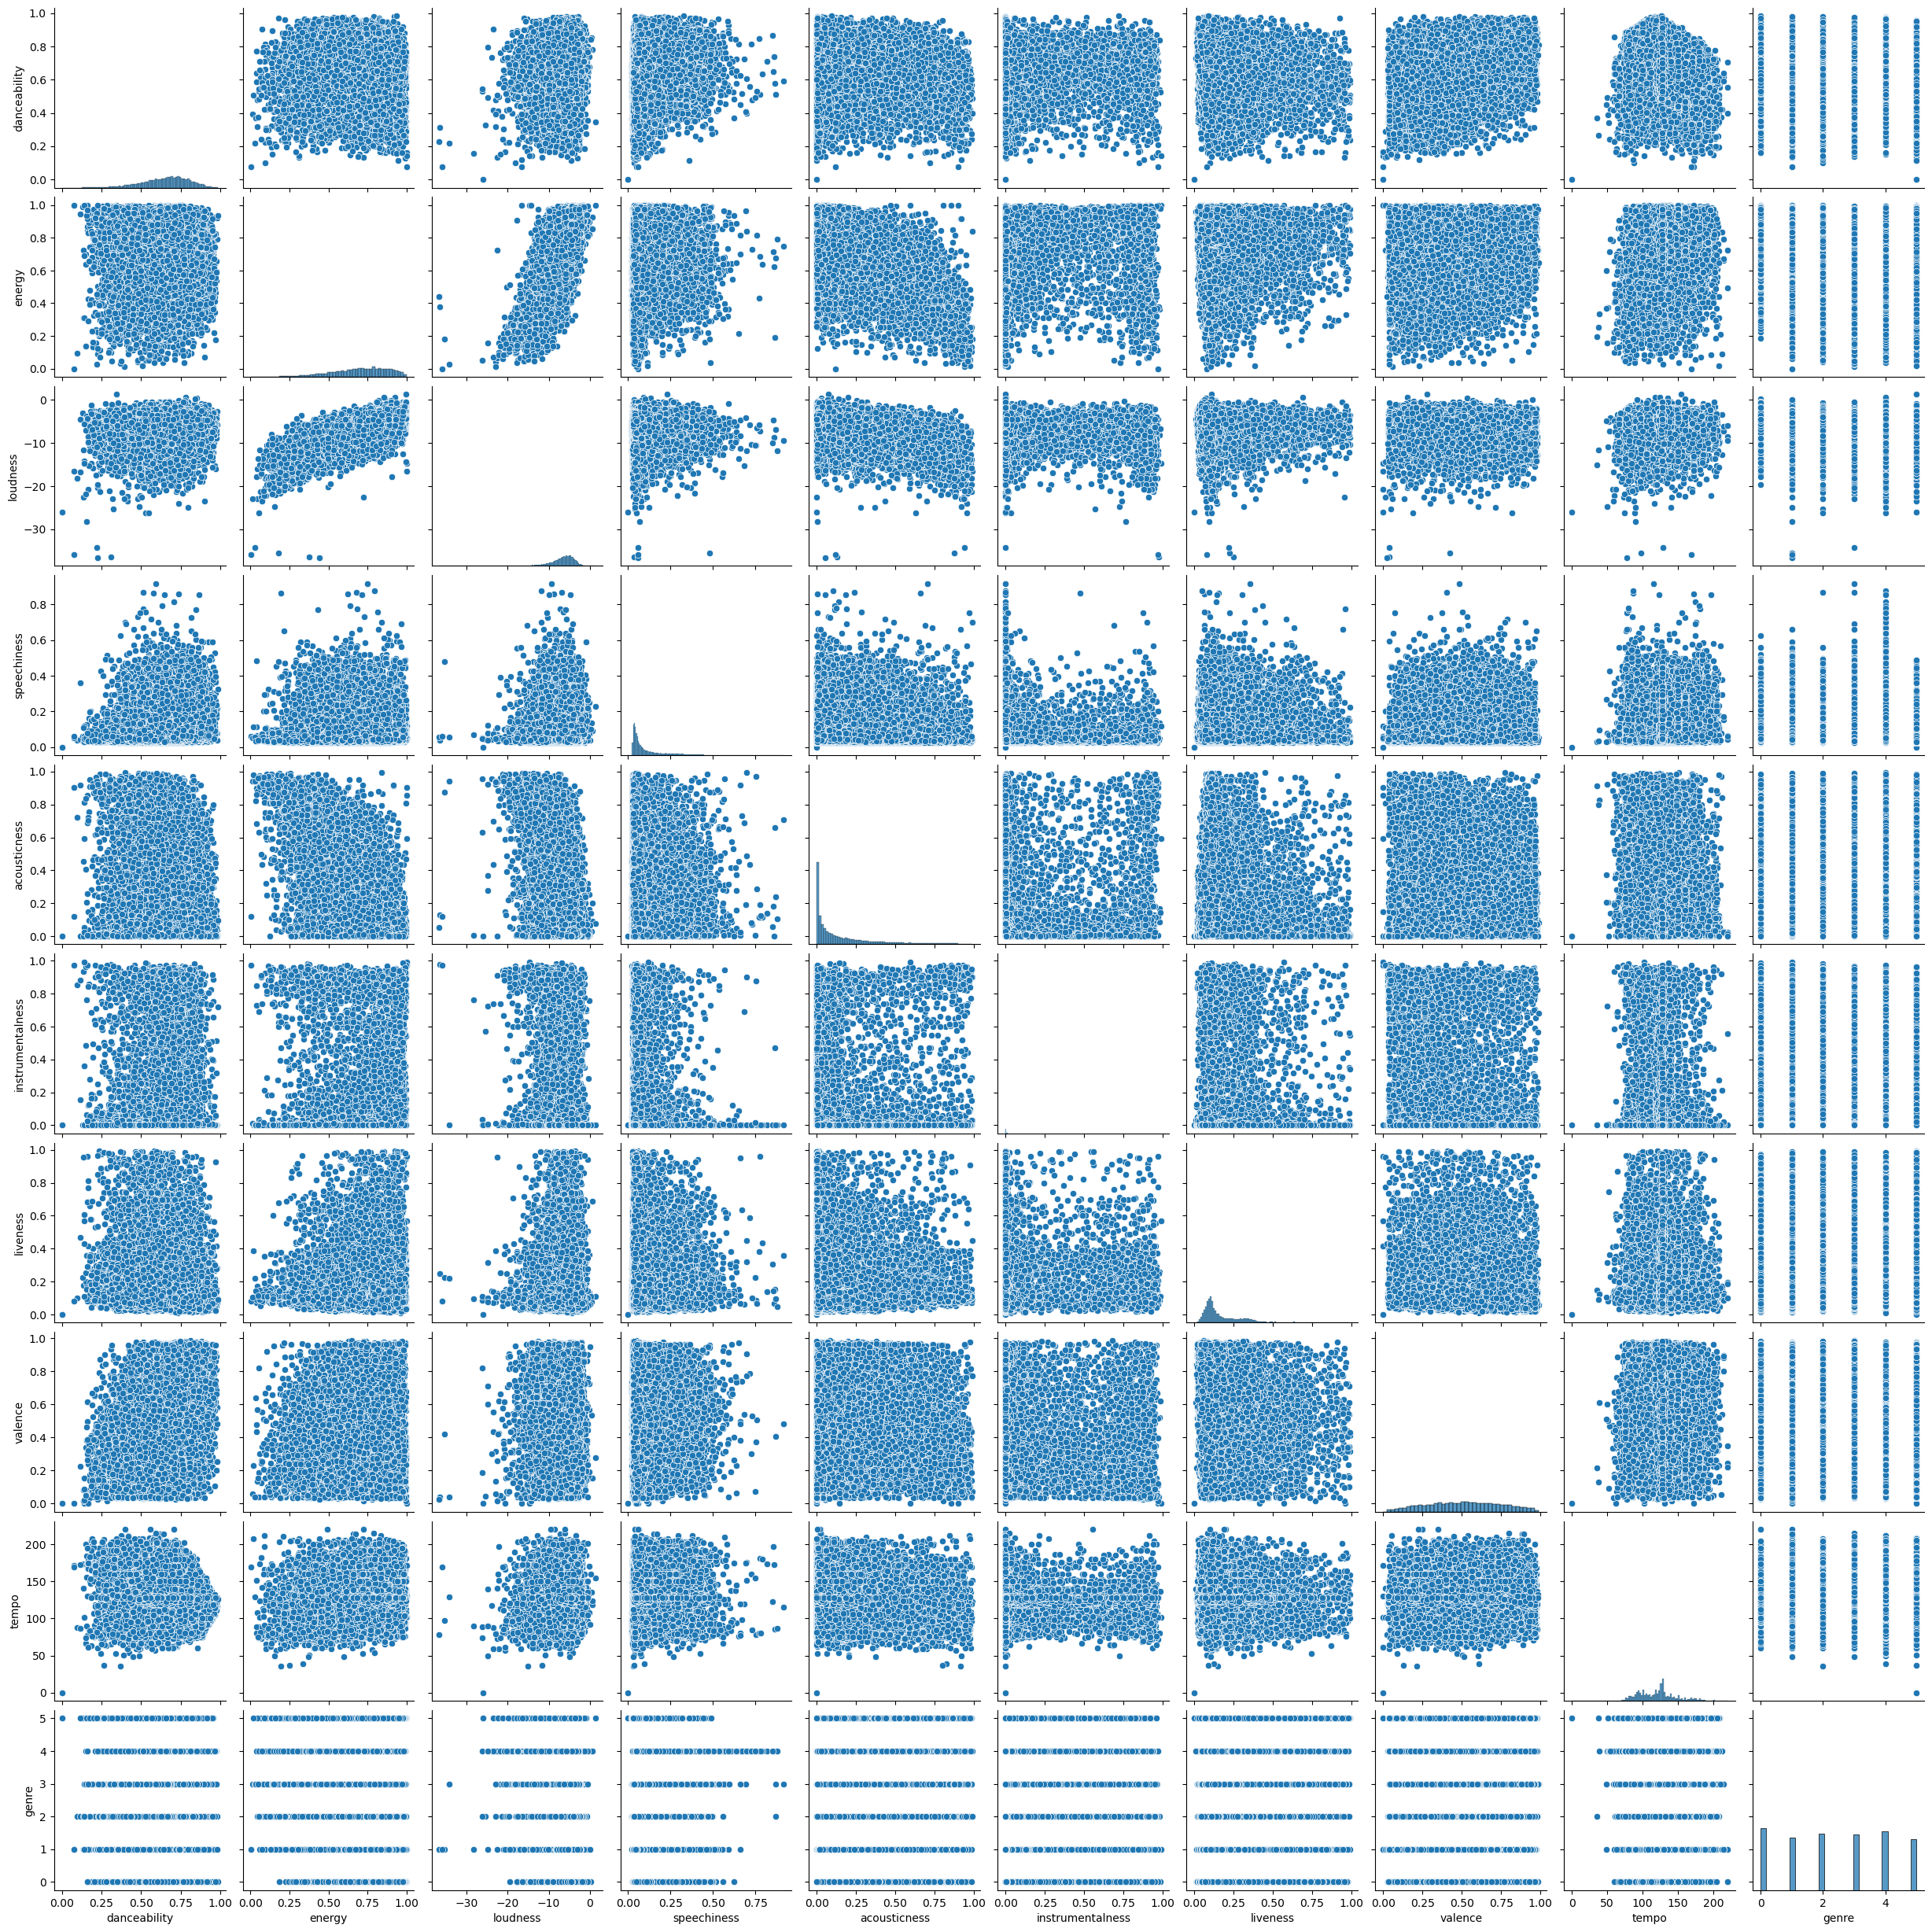

In [9]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(data)
plt.show()

Check if the dataset is balanced.

In [10]:
# Write your code here. Add as many boxes as you need.
data['genre'].value_counts()

genre
0    6043
4    5746
2    5507
3    5431
1    5155
5    4951
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [13]:
# Write your code here. Add as many boxes as you need.
missing_values = data.isna().sum()
missing_percentage = missing_values / len(data) * 100
missing_percentage

danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

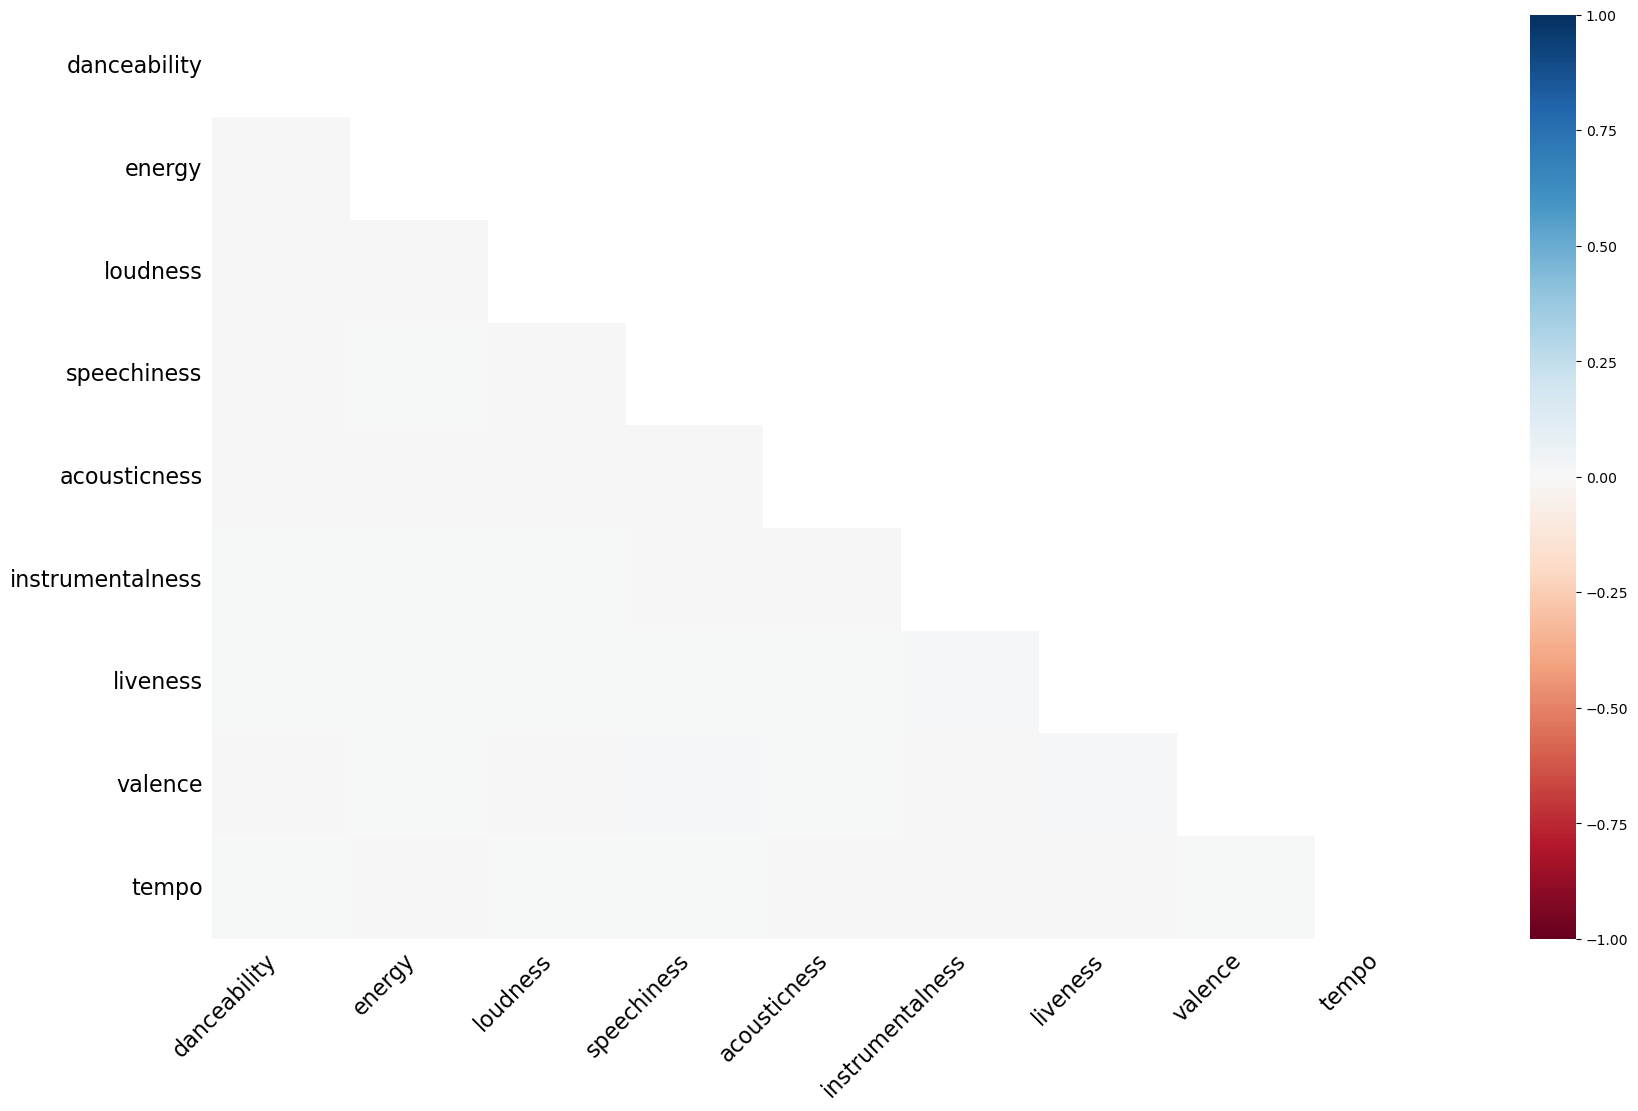

In [16]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

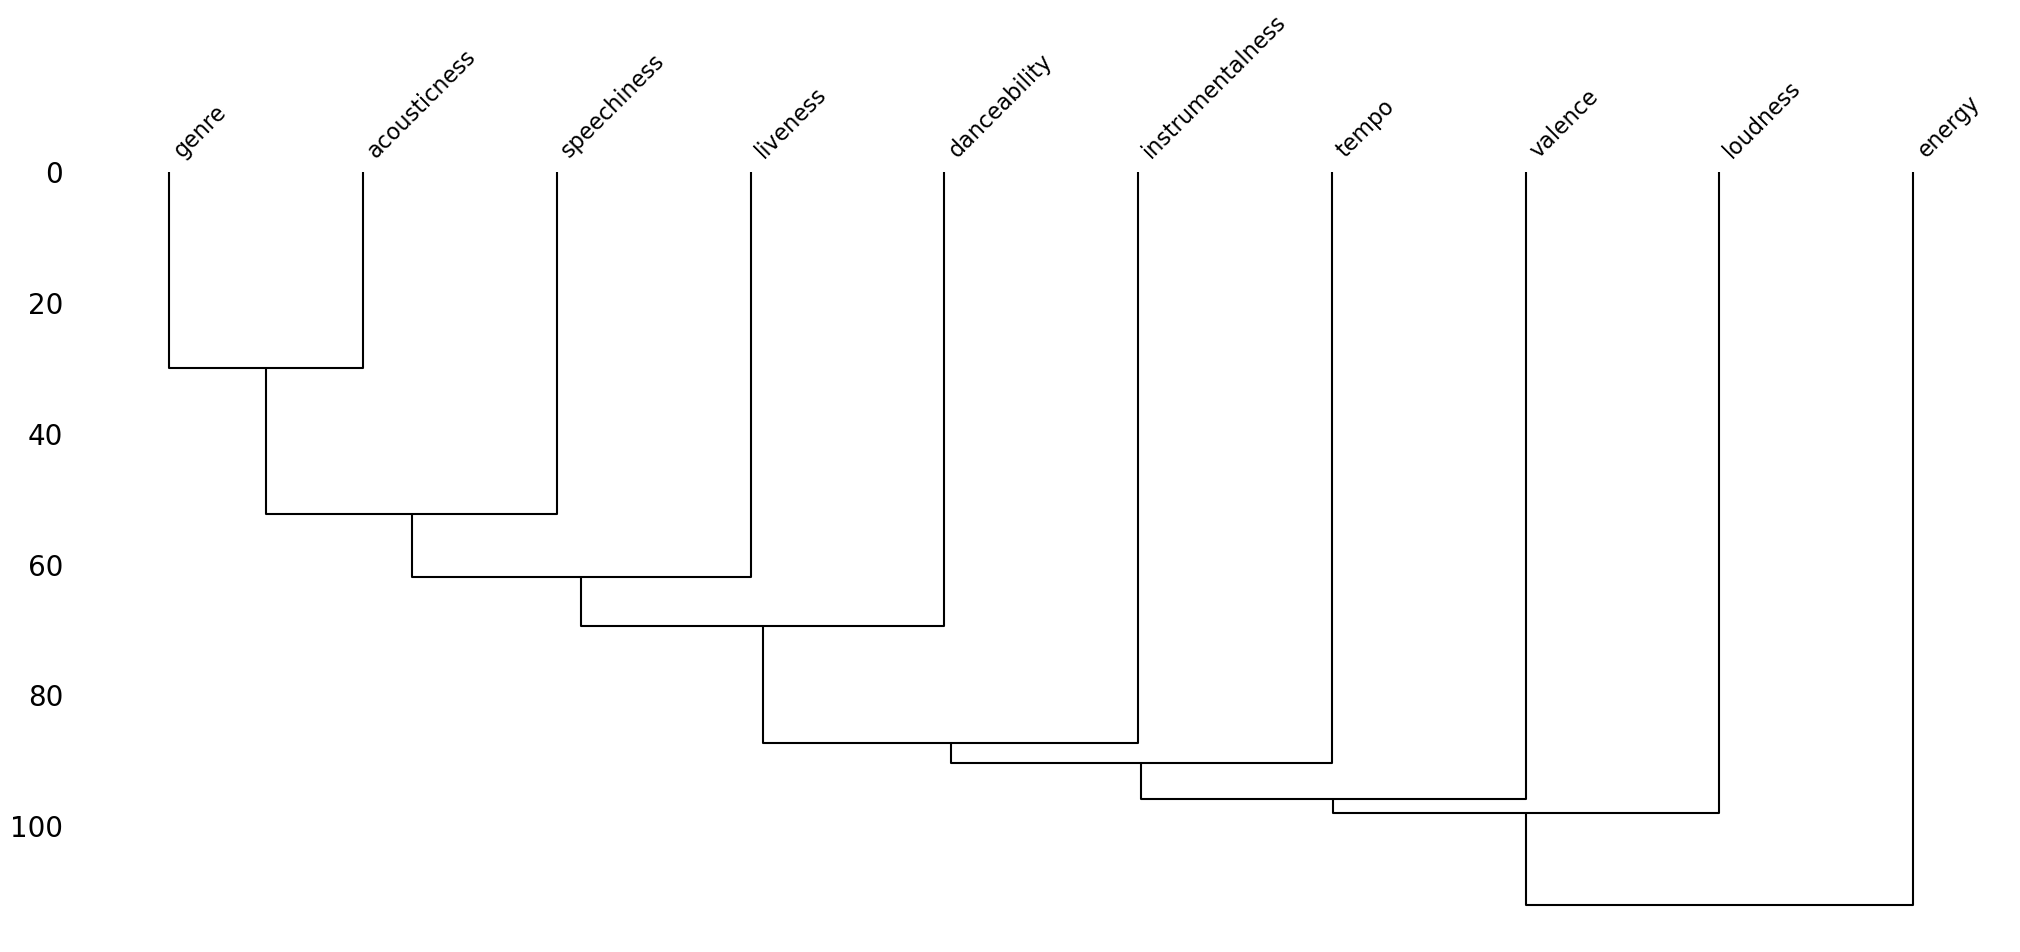

In [17]:
msno.dendrogram(data)
plt.show()

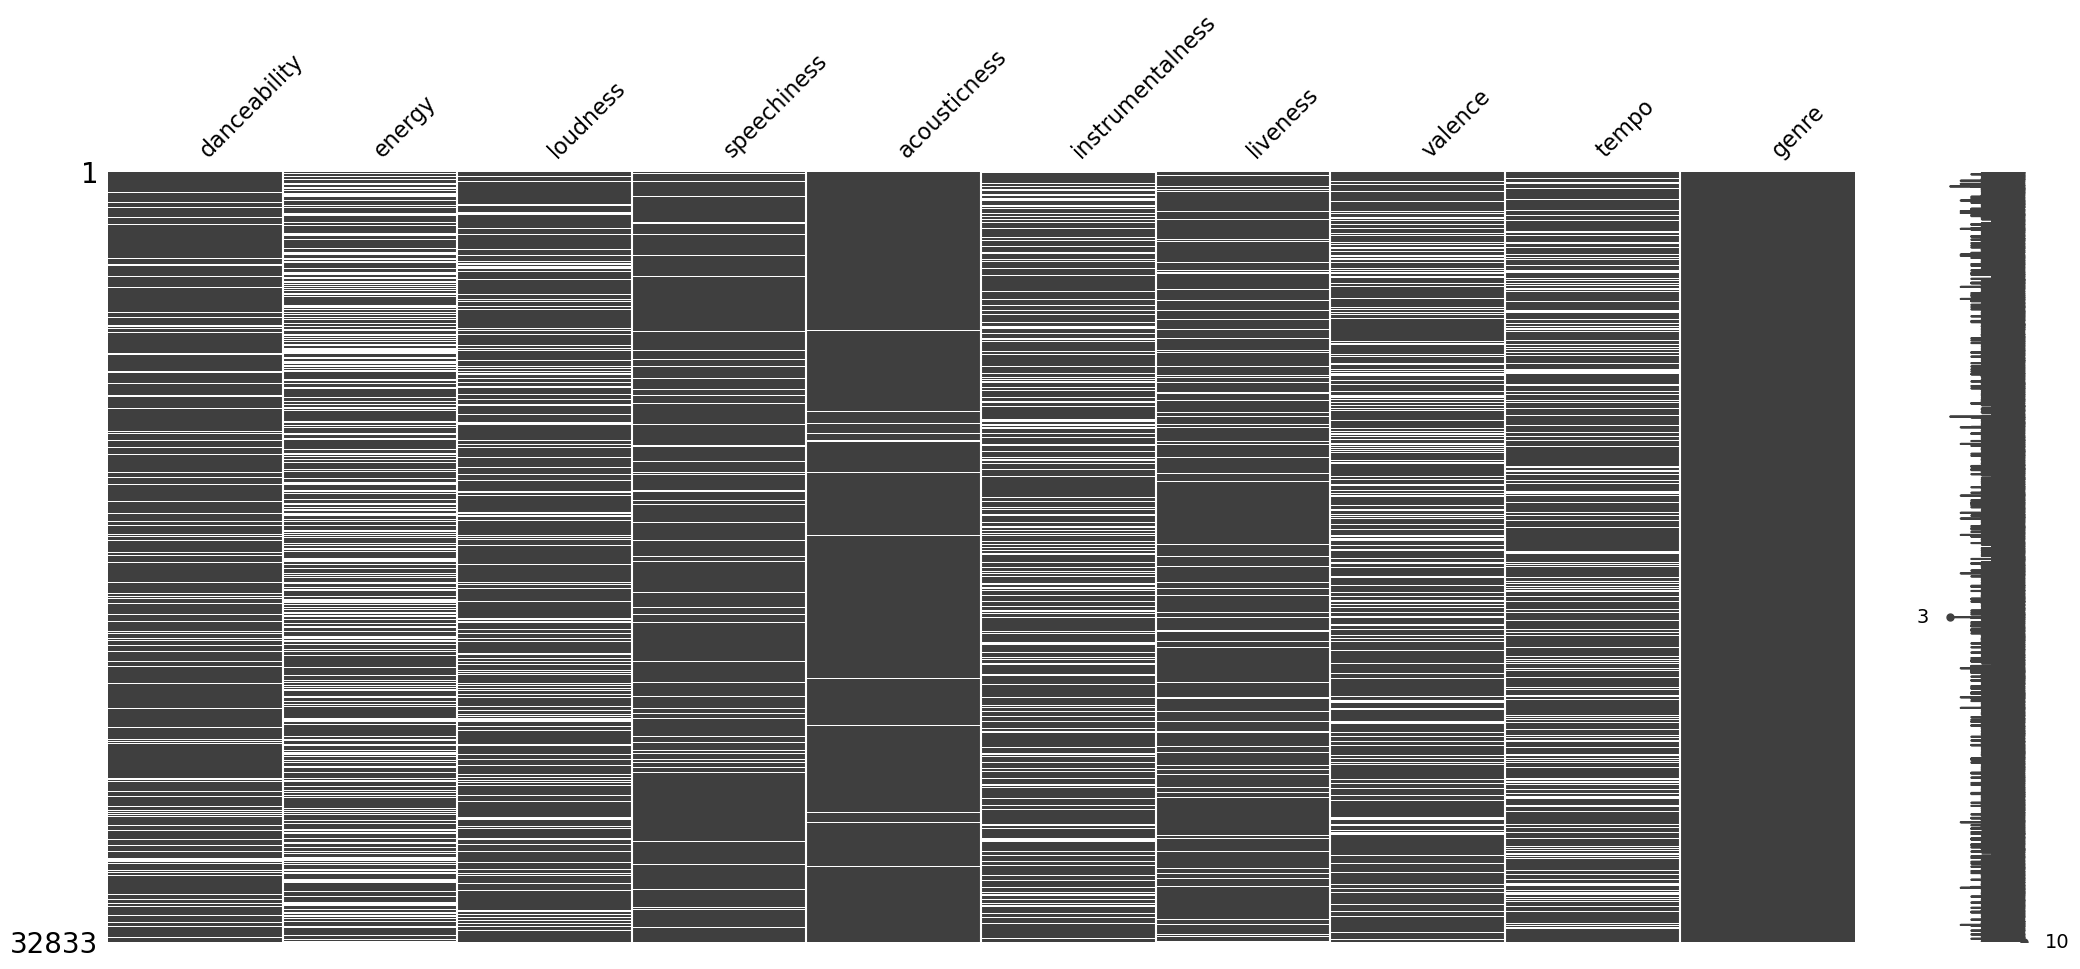

In [28]:
msno.matrix(data)
plt.show()

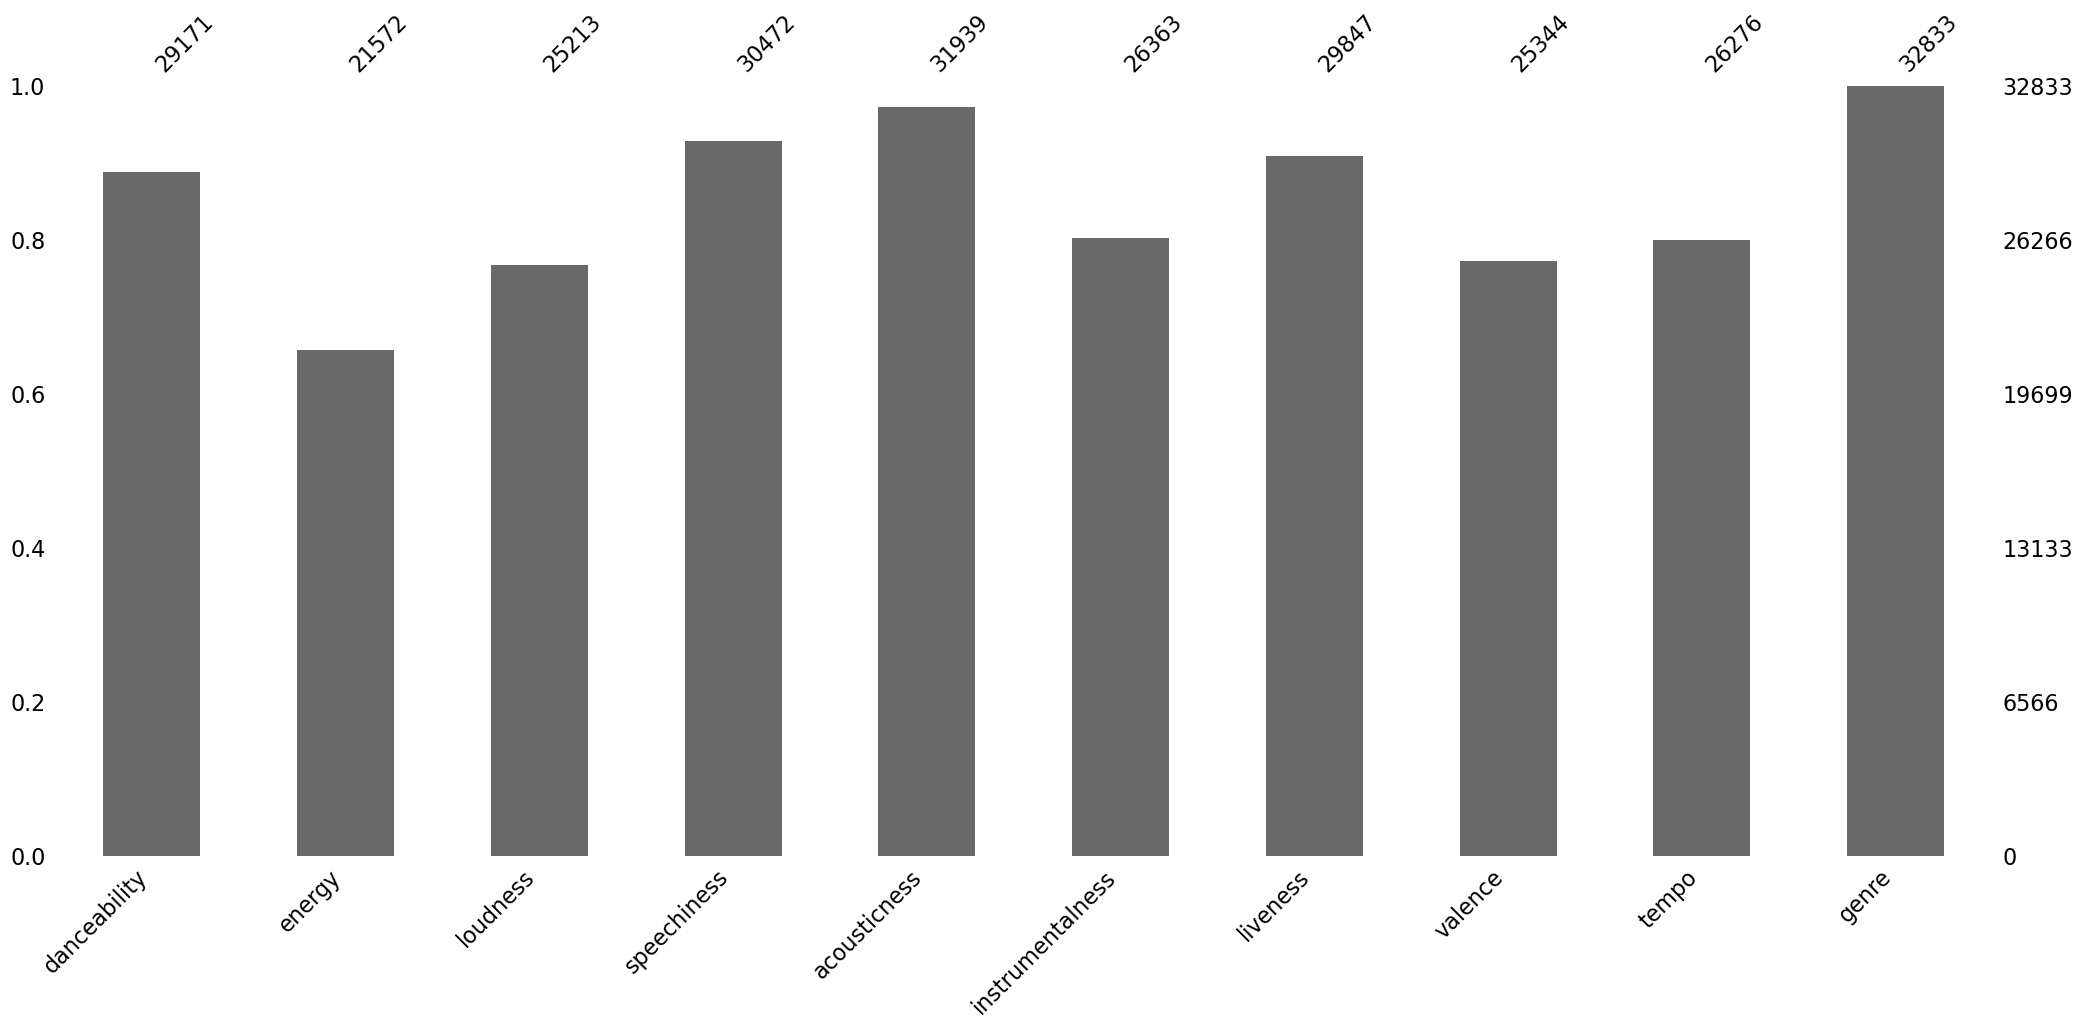

In [29]:
msno.bar(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [32]:
# Write your code here. Add as many boxes as you need.
median_imputer = SimpleImputer(strategy='median')
columns = data[['danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
imputed_columns = median_imputer.fit_transform(columns)
data[['danceability', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = imputed_columns

danceability  energy  loudness  speechiness  acousticness  \
0             0.748   0.916    -2.634       0.0583      0.102000   
1             0.726     NaN    -4.969       0.0373      0.072400   
2             0.675   0.931    -3.432       0.0742      0.079400   
3             0.718   0.930    -3.778       0.1020      0.028700   
4             0.650   0.833    -4.672       0.0359      0.080300   
...             ...     ...       ...          ...           ...   
32828         0.428     NaN    -1.814       0.0936      0.076600   
32829         0.522   0.786    -4.462       0.0420      0.001710   
32830         0.529   0.821    -4.899       0.0481      0.108000   
32831         0.626     NaN    -6.164       0.1090      0.007920   
32832         0.603   0.884    -4.571       0.0625      0.000133   

       instrumentalness  liveness  valence    tempo  genre  
0              0.000000    0.0653   0.5180  122.036      2  
1              0.000016    0.3570   0.6930   99.972      2  
2              0.000016    0.1100   0.6130  124.008      2  
3              0.000009    0.2040   0.2770  121.978      2  
4              0.000000    0.0833   0.7250  123.976      2  
...                 ...       ...      ...      ...    ...  
32828          0.000000    0.0668   0.2100  128.170      0  
32829          0.004270    0.3750   0.4000  128.041      0  
32830          0.000016    0.1500   0.4360  127.989      0  
32831          0.127000    0.3430   0.3080  128.008      0  
32832          0.000016    0.7420   0.0894  127.984      0  

[32833 rows x 10 columns]

In [33]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['energy']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

In [35]:
imputed_data = scaler.inverse_transform(imputed_data)

In [36]:
imputed_data

array([[0.916     ],
       [0.69796416],
       [0.931     ],
       ...,
       [0.821     ],
       [0.69796416],
       [0.884     ]])

In [37]:
data['energy'] = imputed_data

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [40]:
# Write your code here. Add as many boxes as you need.
target = 'genre'
X = data.drop([target], axis=1)
Y = data[target]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

## Feature Scaling
Standardize the features appropriately.

In [42]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [47]:
# Write your code here. Add as many boxes as you need.
X_train

danceability    energy  loudness  speechiness  acousticness  \
23556         0.574  0.489000    -6.962       0.0298       0.57800   
27079         0.675  0.605000    -8.217       0.0760       0.36600   
10503         0.565  0.787000    -8.491       0.0625       0.00237   
12367         0.437  0.697964    -7.842       0.0904       0.39600   
2557          0.584  0.540000    -7.786       0.0576       0.08950   
...             ...       ...       ...          ...           ...   
7464          0.467  0.382000   -13.807       0.0264       0.23600   
24542         0.672  0.627000    -6.164       0.1340       0.39500   
1851          0.571  0.833000    -6.316       0.3620       0.19600   
19508         0.751  0.821000    -4.212       0.0554       0.73200   
14874         0.568  0.697964    -6.164       0.0512       0.00102   

       instrumentalness  liveness  valence    tempo  
23556          0.000000    0.1210    0.572  121.978  
27079          0.000119    0.1150    0.210  121.978  
10503          0.000007    0.0625    0.334  175.209  
12367          0.031400    0.2420    0.512   81.394  
2557           0.000000    0.2610    0.512  137.972  
...                 ...       ...      ...      ...  
7464           0.125000    0.1870    0.512   81.754  
24542          0.000016    0.3050    0.512   77.038  
1851           0.000000    0.2560    0.694  121.978  
19508          0.000016    0.3500    0.827  110.079  
14874          0.004280    0.2940    0.615  121.978  

[26266 rows x 9 columns]

Use the trained model to make predictions for the test set.

In [56]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1)
model.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
y_pred = model.predict(X_test_scaled)

Assess the performance of the model by using different classification metrics.

In [58]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.496269224912441

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.